### Superposition
A fundamental principle of quantum mechanics is the existence of superposition states, in which an object is in two states at the same time. 

For example the general quantum state of a qubit with the states $|0\rangle$ and $|1\rangle$  can be written as a linear combination: $c_0|0\rangle + c_1|1\rangle$   
The coefficients $c_0$ and $c_1$ are complex numbers and are generalized probabilities: $|c_0|^2 + |c_1|^2=1$.

Now the qubit can exists in a superposition of $|0\rangle$ and $|1\rangle$: $|\psi\rangle = \sqrt{0.5}|0\rangle + \sqrt{0.5}|1\rangle$
#### Quantum-Zeno-Effect
The quantum Zeno effect is an effect from quantum mechanics in which the transition of a quantum mechanical system from one state to another can be halted by repeated measurements.
#### Example
An atom does not decay at a specific time, but randomly according to statistical criteria. If an atom is in a superposition (decayed/not decayed), then there is a probability that the atom is deacaying. At the beginning the atom is in the state where it is not decayed and the probability of decaying is low. With an spontaneously event, like the decay of an atom the probability of decaying increases over the time. If you measure the atom, the atom is with high probability not decayed. Because of the observation, the atom here goes back to the "not decayed" state and the decay process starts all over again. If we now repeat the measurements the decay rate is significantly lower than the unobserve decay rate. If the gaps between the observations is going to zero, which is basically a permanent observation, the decay probability is going to zero. This means that the atom is kept in the state and should not decay.

### Qiskit Gatter

#### Hadamard
The Hadamard gate transfers the state of a qubit into the superposed state (superposition) of $|0\rangle$ and $|1\rangle$ (starting from the initial state $|0\rangle$).
In the Bloch sphere, this would be a rotation of 90° around the y-axis and a roatation of the z-axis by 180°. In matrix representation, the gate would look like this: $H = \frac{1}{\sqrt{2}} \begin{pmatrix} 1 & 1 \\ 1 & -1 \end{pmatrix} $ 

##### Example
In the following example, the Hadamard gate is applied to the qubit with the initial state $|0\rangle$ and then the qubit will be measured. Since it is brought into superposition by the Hadamard gate, the qubit collapses to either $|0\rangle$ or $|1\rangle$ when measured.

The matrix representation of the qubit before the measurement is:
$\begin{pmatrix}1 \\ 0\end{pmatrix} \cdot \frac{1}{\sqrt{2}} \begin{pmatrix} 1 & 1 \\ 1 & -1 \end{pmatrix} = \begin{pmatrix}\frac{1}{\sqrt{2}} \\ \frac{1}{\sqrt{2}} \end{pmatrix} $

Applying the Hadamard gate again, one would come out at the initial state of the qubit again.

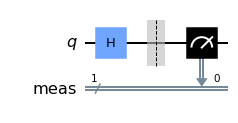

In [2]:
from qiskit import QuantumCircuit

hadamard = QuantumCircuit(1)
hadamard.h(0)
hadamard.measure_all()
hadamard.draw(output="mpl")

If we now simulate the circuit, we get 50% $|0\rangle$ and 50% $|1\rangle$.

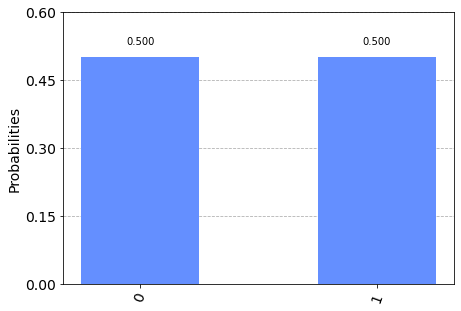

In [11]:
from qiskit.providers.aer import QasmSimulator

simulator = QasmSimulator()
job = simulator.run(hadamard, shots=100000)
result = job.result()

from qiskit.visualization import plot_histogram
plot_histogram(result.get_counts(hadamard))

#### C-NOT
The C-NOT Gate has two input qubits $q_0$ and $q_1$. The value of $q_0$ remains the same over the whole operation. The value of $q_1$ will be changed in dependence of $q_0$. If $q_0$ is zero the value of $q_1$ will be remained. If $q_0$ is one, the value of $q_1$ will be negates.

$|00\rangle \rightarrow |00\rangle $   
$|01\rangle \rightarrow |01\rangle $   
$|10\rangle \rightarrow |11\rangle $   
$|11\rangle \rightarrow |10\rangle $    

In the matrix representation: $\begin{pmatrix}1 & 0 & 0 & 0 \\ 0& 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0\end{pmatrix}$

##### Example
In the following circuit we have to qubits. On the first qubit a Hadamard-Gate will be applied. After that the second qubit will be connected to the first one with the C-NOT gate.

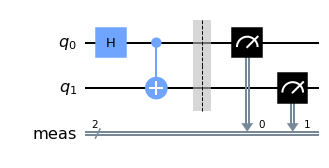

In [3]:
cnot = QuantumCircuit(2)
cnot.h(0)
cnot.cx(0, 1)
cnot.measure_all()
cnot.draw(output="mpl")

In the end the there a two possible outcomes. Either both $q_0$ and $q_1$ are zero or one.

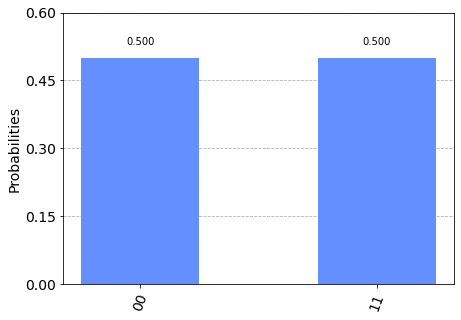

In [18]:
simulator = QasmSimulator()
job = simulator.run(cnot, shots=100000)
result = job.result()

from qiskit.visualization import plot_histogram
plot_histogram(result.get_counts(cnot))

#### CC-Not
The CCXGate (CC-NOT or Controlled CNOT) also known as the Toffoli gate is a gate with three input qubits $q_0$, $q_1$, $q_2$. If the first two qubits $q_0$ and $q_1$ are $1$ the third qubit $q_2$ will be inverted. In all other cases $q_2$ does not change. In the matrix representation:
$CCX_{q_0, q_1, q_2} = 
    \begin{pmatrix}
        1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
        0 & 1 & 0 & 0 & 0 & 0 & 0 & 0\\
        0 & 0 & 1 & 0 & 0 & 0 & 0 & 0\\
        0 & 0 & 0 & 1 & 0 & 0 & 0 & 0\\
        0 & 0 & 0 & 0 & 1 & 0 & 0 & 0\\
        0 & 0 & 0 & 0 & 0 & 1 & 0 & 0\\
        0 & 0 & 0 & 0 & 0 & 0 & 0 & 1\\
        0 & 0 & 0 & 0 & 0 & 0 & 1 & 0\\
    \end{pmatrix}
$

#### Rotation Gates
##### RXGate
The RXGate rotates a single qubit around the x-axis. In the matrix representation the RXGate would be: $$R_x (\theta) = \begin{pmatrix} \cos\left(\frac{\theta}{2}\right) & -i\sin\left(\frac{\theta}{2}\right) \\ -i\sin\left(\frac{\theta}{2}\right) & \cos\left(\frac{\theta}{2}\right) \end{pmatrix}$$
##### RYGate
The RYGate rotates a single qubit around the y-axis. In the matrix representation the RYGate would be: $$R_y (\theta) = \begin{pmatrix} \cos\left(\frac{\theta}{2}\right) & \sin\left(\frac{\theta}{2}\right) \\ \sin\left(\frac{\theta}{2}\right) & \cos\left(\frac{\theta}{2}\right) \end{pmatrix}$$
##### RZGate
The RZGate rotates a single qubit around the z-axis. In the matrix representation the RZGate would be: $$R_z (\theta) = \begin{pmatrix} e^{-i\frac{\theta}{2}} & 0 \\ 0 & e^{-i\frac{\theta}{2}} \end{pmatrix}$$